# Salary Predictions Based on Job Descriptions

## Table of contents
1. [Part 1 - Problem Definition](#problem1)
2. [Part 2 - Exploratory Data Analysis](#eda2)
    1. [Load Data](#load1)
    2. [Display Data](#display2)
    3. [Clean Data](#clean3)
    4. [Explore Data](#explore4)
    5. [Propose Models](#solutions5)
3. [Part 3 - Model Development and Evaluation](#mod3)
    1. [Preprocess Data](#prep1)
    2. [Train Models](#train2)
    3. [Prediction](#predict3)


## Part 1 - Problem Definition <a name ="problem1"></a>

### ---- 1 Aim of this Project ----

This project aims to build a model that predicts the yearly salary of of employees based on the following background information provided:
* jobId,
* companyId
* type of job
* degree
* major
* industry
* years of experience
* miles from metropolis

In [173]:
#Info on author 
__author__ = "Karin Pietruska"
__email__ = "karin.pietruska@gmail.com"

In [174]:
#import libraries
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

## Part 2 - Exploratory Data Analysis <a name ="eda2"></a>

### ---- 1 Load Data ---- <a name ="load1"></a>

In [175]:
#load the data into a Pandas dataframe
path = "data/"
train_features_df = pd.read_csv(path + "train_features.csv")
train_salaries_df = pd.read_csv(path + "train_salaries.csv")
test_features_df = pd.read_csv(path + "test_features.csv")

### ---- 2 Display Data ---- <a name ="display2"></a>

In [176]:
# display first five rows of training features 
train_features_df.head(5)

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16

In [177]:
# display first five rows of training dataframe with salary information
train_salaries_df.head(5)

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [178]:
# display size and variable types of training dataframe with features
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [179]:
# display size, column names and varaiable types of training dataframe with salary information
train_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [180]:
# display size, column names and variable types for the test dataframe with features 
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


### ---- 3 Clean the data ----  <a name ="clean3"></a>

#### Check for duplciates

In [181]:
# look for duplicate data based jobId and companyId 
duplicateRows_tf_df = train_features_df[train_features_df.duplicated(subset=['jobId','companyId'], keep='last')]
print("Number of rows that have identical jobId and companyId in train_features_df: " + str(len(duplicateRows_tf_df)))

duplicateRows_ts_df = train_salaries_df[train_salaries_df.duplicated(subset=['jobId'], keep='last')]
print("Number of rows that have identical jobId in train_salaries_df: " + str(len(duplicateRows_ts_df)))

duplicateRows_tesf_df = train_salaries_df[train_salaries_df.duplicated(subset=['jobId'], keep='last')]
print("Number of rows that have identical jobId in train_salaries_df: " + str(len(duplicateRows_tesf_df)))

Number of rows that have identical jobId and companyId in train_features_df: 0
Number of rows that have identical jobId in train_salaries_df: 0
Number of rows that have identical jobId in train_salaries_df: 0


#### Check for missing values

In [182]:
# look for missing values of standard type: NA, NaN, " "   
print(train_features_df.isnull().sum())

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


In [183]:
print(train_salaries_df.isnull().sum())

jobId     0
salary    0
dtype: int64


In [184]:
print(test_features_df.isnull().sum())

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


#### Check for invalid data

In [185]:
#check for salary <= 0 in train_salaries_df and display rows 
inval_salaries = train_salaries_df.loc[train_salaries_df['salary'] <= 0]
train_salaries_df.iloc[inval_salaries.index]

jobId  salary
30559   JOB1362684438246       0
495984  JOB1362684903671       0
652076  JOB1362685059763       0
816129  JOB1362685223816       0
828156  JOB1362685235843       0

In [186]:
# display rows with corresponding invalid salaries in the train_features_df
train_features_df.iloc[inval_salaries.index]

jobId companyId         jobType       degree        major  \
30559   JOB1362684438246    COMP44          JUNIOR     DOCTORAL         MATH   
495984  JOB1362684903671    COMP34          JUNIOR         NONE         NONE   
652076  JOB1362685059763    COMP25             CTO  HIGH_SCHOOL         NONE   
816129  JOB1362685223816    COMP42         MANAGER     DOCTORAL  ENGINEERING   
828156  JOB1362685235843    COMP40  VICE_PRESIDENT      MASTERS  ENGINEERING   

       industry  yearsExperience  milesFromMetropolis  
30559      AUTO               11                    7  
495984      OIL                1                   25  
652076     AUTO                6                   60  
816129  FINANCE               18                    6  
828156      WEB                3                   29

The job type, degrees and industries assocaited with 0$ salary entries do not indicate that this was volunteer work. Data rows with 0$ salaries are therefore considered as invalid entries and are removed from further analysis. 

In [187]:
# delete rows with invalid salaries 
train_salaries_df.drop(axis = 0, index = inval_salaries.index, inplace=True)
len(train_salaries_df)

999995

In [188]:
# delete the rows with invalid salaries in the train_features_df
train_features_df.drop(axis = 0, index = inval_salaries.index, inplace=True)
len(train_features_df)

999995

In [189]:
#reset index 
train_features_df.reset_index(drop=True)
train_salaries_df.reset_index(drop=True)

jobId  salary
0       JOB1362684407687     130
1       JOB1362684407688     101
2       JOB1362684407689     137
3       JOB1362684407690     142
4       JOB1362684407691     163
...                  ...     ...
999990  JOB1362685407682      88
999991  JOB1362685407683     160
999992  JOB1362685407684      64
999993  JOB1362685407685     149
999994  JOB1362685407686      88

[999995 rows x 2 columns]

In [190]:
# merge train_features and train salaries based on jobid (= unique identifier for each row)
train_df = pd.merge(train_features_df, train_salaries_df, on="jobId")

In [191]:
train_df.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  salary  
0   HEALTH               10                   83     130  
1      WEB                3                   73     101  
2   HEALTH               10                   38     137  
3     AUTO                8                   17     142  
4  FINANCE                8                   16     163

### ---- 4 Explore the data (EDA) ----  <a name ="explore4"></a>

In [192]:
# separate numerical and categorical variables 
vars_categorical = ['jobId','companyId','jobType','degree','major','industry']
vars_numeric = ['yearsExperience','milesFromMetropolis', 'salary']

#### Summary Statistics for Features 

In [193]:
# summary statistics for categorical variables 
train_df[vars_categorical].describe()

jobId companyId jobType       degree   major industry
count             999995    999995  999995       999995  999995   999995
unique            999995        63       8            5       9        7
top     JOB1362685116403    COMP39  SENIOR  HIGH_SCHOOL    NONE      WEB
freq                   1     16193  125886       236975  532353   143205

In [194]:
# summary statistics for numerical variables 
train_df[vars_numeric].describe()

yearsExperience  milesFromMetropolis         salary
count    999995.000000        999995.000000  999995.000000
mean         11.992407            49.529381     116.062398
std           7.212390            28.877721      38.717163
min           0.000000             0.000000      17.000000
25%           6.000000            25.000000      88.000000
50%          12.000000            50.000000     114.000000
75%          18.000000            75.000000     141.000000
max          24.000000            99.000000     301.000000

#### Frequency Plots for Categorical Feature Variables

<AxesSubplot:>

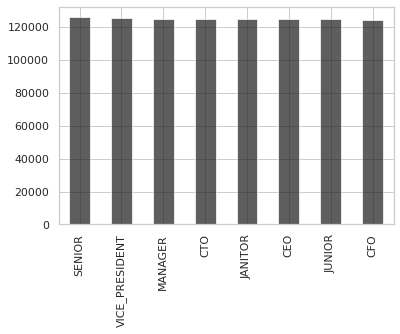

In [195]:
# plot frequencies of job types 
train_df['jobType'].value_counts().plot.bar(color='k', alpha=0.7)

The dataset appears to be balanced with respect to the different job types contained in it. 

<AxesSubplot:>

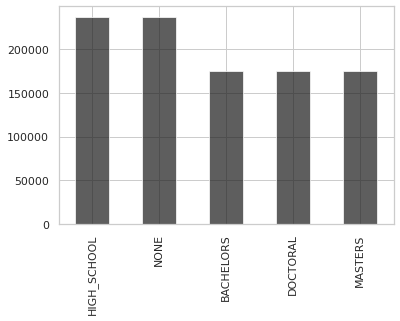

In [196]:
# plot frequencies of degrees
train_df['degree'].value_counts().plot.bar(color='k', alpha=0.7)

<AxesSubplot:>

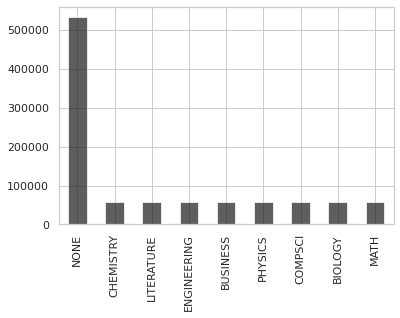

In [197]:
train_df['major'].value_counts().plot.bar(color='k', alpha=0.7)

<AxesSubplot:>

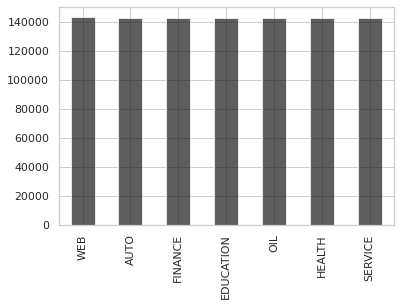

In [198]:
train_df['industry'].value_counts().plot.bar(color='k', alpha=0.7)

#### Boxplots for Numeric Feature Variables

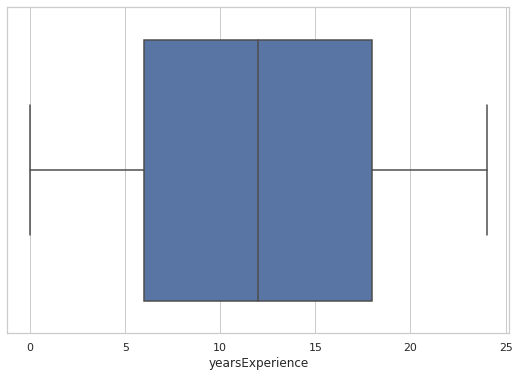

In [199]:
sns.set_theme(style = "whitegrid")
plt.figure(figsize = (9,6))
ax = sns.boxplot(x=train_df["yearsExperience"])

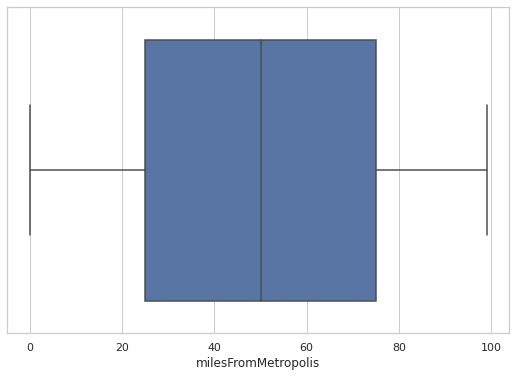

In [200]:
sns.set_theme(style = "whitegrid")
plt.figure(figsize = (9,6))
ax = sns.boxplot(x=train_df["milesFromMetropolis"])

#### Explore Target Variable 

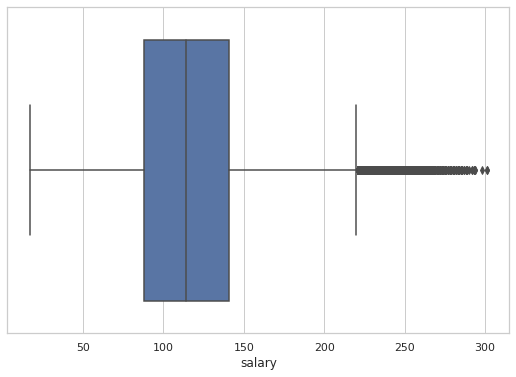

In [201]:
# boxplot of target variable 
sns.set_theme(style = "whitegrid")
plt.figure(figsize = (9,6))
ax = sns.boxplot(x=train_df["salary"])

There appear to be some outliers in the high range of salaries around 250k$. No outliers are observed in the low salary range. Outliers will be further investigated in subsequent cells. 

Text(0.5, 0, 'Salary in k $')

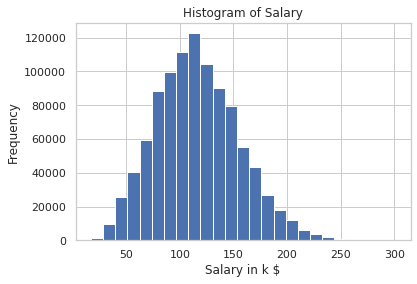

In [202]:
# display distribution of target variable
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
ax.hist(train_df['salary'], bins=25)
ax.set_title('Histogram of Salary')
ax.set_ylabel('Frequency')
ax.set_xlabel('Salary in k $')

#### Detect Outliers in Target Variable

In [203]:
# Looking at the boxplot we can see that there are a few outlier values in the upper salary range above
# 250k $ salary 
# formal definition of outliers in the upper range based on interquartile range (IQR) is: Q3 + 1.5 * IQR

def detect_outliersIQR(df, col_name):
    data = df[col_name]
    q1,q3 = np.percentile(df[col_name], [25,75])
    iqr = q3 - q1
    lo_bound = q1 - (1.5 * iqr)
    up_bound = q3 + (1.5 * iqr)
    outliers_up = df[df[col_name] > up_bound]
    outliers_lo = df[df[col_name]< lo_bound]
    return outliers_lo, outliers_up, lo_bound, up_bound


In [204]:
lo_outliers, up_outliers, lo_bound, up_bound = detect_outliersIQR(train_df, 'salary')
print(lo_bound)
lo_outliers.head()


8.5


Empty DataFrame
Columns: [jobId, companyId, jobType, degree, major, industry, yearsExperience, milesFromMetropolis, salary]
Index: []

In [205]:
print(up_bound)
up_outliers.head(10)



220.5


jobId companyId         jobType       degree        major  \
266   JOB1362684407953    COMP30             CEO      MASTERS      BIOLOGY   
362   JOB1362684408049    COMP38             CTO      MASTERS         NONE   
560   JOB1362684408247    COMP53             CEO      MASTERS      BIOLOGY   
670   JOB1362684408357    COMP26             CEO      MASTERS         MATH   
719   JOB1362684408406    COMP54  VICE_PRESIDENT     DOCTORAL      BIOLOGY   
966   JOB1362684408653    COMP32             CEO     DOCTORAL  ENGINEERING   
986   JOB1362684408673    COMP37             CFO  HIGH_SCHOOL         NONE   
1211  JOB1362684408898    COMP24             CTO     DOCTORAL     BUSINESS   
1222  JOB1362684408909    COMP40          JUNIOR      MASTERS      COMPSCI   
1413  JOB1362684409100    COMP56  VICE_PRESIDENT      MASTERS         MATH   

     industry  yearsExperience  milesFromMetropolis  salary  
266       OIL               23                   60     223  
362    HEALTH               24                    3     223  
560       WEB               22                    7     248  
670      AUTO               23                    9     240  
719       OIL               21                   14     225  
966   FINANCE               23                   11     247  
986   FINANCE               24                   20     229  
1211  FINANCE                5                   46     232  
1222      OIL               24                    5     225  
1413      WEB               24                   15     241

In [206]:
up_outliers[up_outliers["jobType"]=="JUNIOR"]

jobId companyId jobType     degree        major industry  \
1222    JOB1362684408909    COMP40  JUNIOR    MASTERS      COMPSCI      OIL   
27710   JOB1362684435397    COMP21  JUNIOR   DOCTORAL  ENGINEERING      OIL   
31354   JOB1362684439042    COMP45  JUNIOR   DOCTORAL      COMPSCI  FINANCE   
100041  JOB1362684507729    COMP17  JUNIOR   DOCTORAL     BUSINESS  FINANCE   
160332  JOB1362684568020    COMP18  JUNIOR   DOCTORAL     BUSINESS  FINANCE   
189581  JOB1362684597269    COMP32  JUNIOR   DOCTORAL     BUSINESS      OIL   
214605  JOB1362684622293    COMP47  JUNIOR    MASTERS     BUSINESS  FINANCE   
303777  JOB1362684711465    COMP51  JUNIOR    MASTERS  ENGINEERING      WEB   
348353  JOB1362684756041    COMP56  JUNIOR   DOCTORAL  ENGINEERING      OIL   
427592  JOB1362684835280    COMP54  JUNIOR   DOCTORAL  ENGINEERING  FINANCE   
500737  JOB1362684908426    COMP40  JUNIOR   DOCTORAL  ENGINEERING      OIL   
627532  JOB1362685035221     COMP5  JUNIOR   DOCTORAL  ENGINEERING      OIL   
645553  JOB1362685053242    COMP36  JUNIOR   DOCTORAL     BUSINESS  FINANCE   
656569  JOB1362685064259    COMP28  JUNIOR   DOCTORAL     BUSINESS      OIL   
685772  JOB1362685093462    COMP38  JUNIOR  BACHELORS  ENGINEERING      OIL   
743323  JOB1362685151013    COMP14  JUNIOR   DOCTORAL     BUSINESS  FINANCE   
787671  JOB1362685195361    COMP43  JUNIOR   DOCTORAL     BUSINESS  FINANCE   
796953  JOB1362685204643    COMP30  JUNIOR    MASTERS     BUSINESS      OIL   
855214  JOB1362685262906    COMP13  JUNIOR    MASTERS  ENGINEERING      OIL   
954363  JOB1362685362055    COMP11  JUNIOR   DOCTORAL     BUSINESS      OIL   

        yearsExperience  milesFromMetropolis  salary  
1222                 24                    5     225  
27710                24                    3     246  
31354                24                    0     225  
100041               23                    8     248  
160332               22                    3     223  
189581               24                   11     221  
214605               22                    4     222  
303777               24                    2     226  
348353               23                   25     226  
427592               23                    3     221  
500737               21                    0     227  
627532               24                   29     230  
645553               24                    1     225  
656569               22                    3     222  
685772               24                   13     225  
743323               19                    0     236  
787671               18                   15     232  
796953               24                    2     228  
855214               22                   26     225  
954363               24                   26     223

The outliers in the upper salary ranges appear as valid entries. Junior positions with very high salaries are associated with advanced degrees and/or are located in industries that are known for paying high salaries such as the oil industry or the financial sector. 

#### Explore Relations Between Feature Variables and Target Variable

In [207]:
# method to visualize associations between features and target

def expl_relation(df, feature, target, vars_numeric, vars_categorical):
    "explores correlations between feature variables and target variable"
    figure = plt.figure(figsize=(8,6))
    if feature in vars_categorical:
        sorted_cl = df.groupby([feature])[target].median().sort_values()
        sns.boxplot(x=df[feature], y=df[target], order=list(sorted_cl.index))
        plt.xticks(rotation=45)
        plt.ylabel(target)
        plt.show()
    elif feature in vars_numeric:
        sns.scatterplot(x=df[feature], y=df[target])
        plt.show()
        

In [208]:
target = 'salary'
train_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

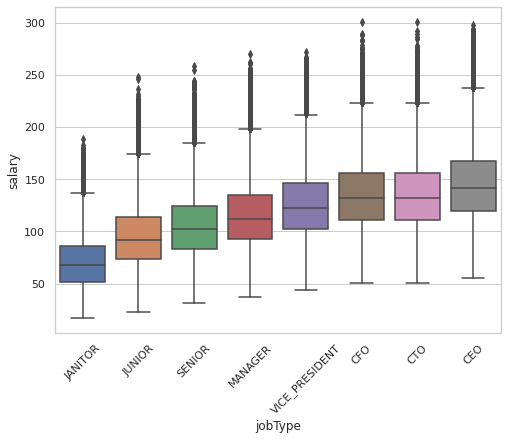

In [209]:
expl_relation(train_df, 'jobType', target, vars_numeric, vars_categorical)

There is an increase of salary from janitor to junior positions up to manager, vice precident and CFO, CTO, CEO roles. 

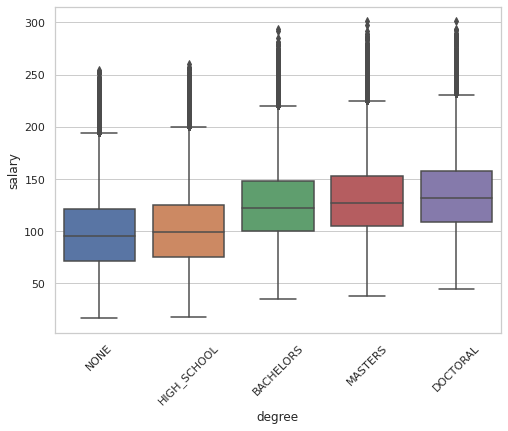

In [210]:
expl_relation(train_df, 'degree', target, vars_numeric, vars_categorical)

The higher the educational degree the higher the salary. Whereby the most pronounced difference is between university degree holders and non university degree holders. 

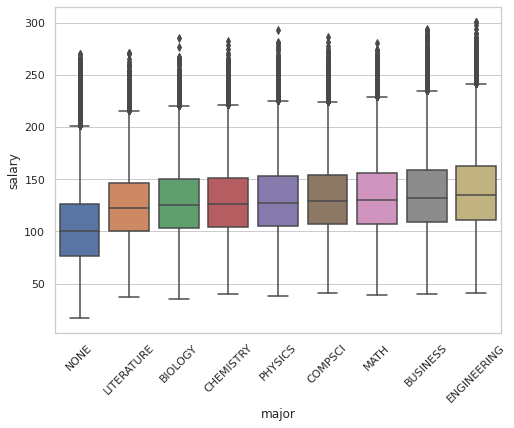

In [211]:
expl_relation(train_df, 'major', 'salary', vars_numeric, vars_categorical)

Employees with majors in engineering, business and math or computer science tend to earn more. 

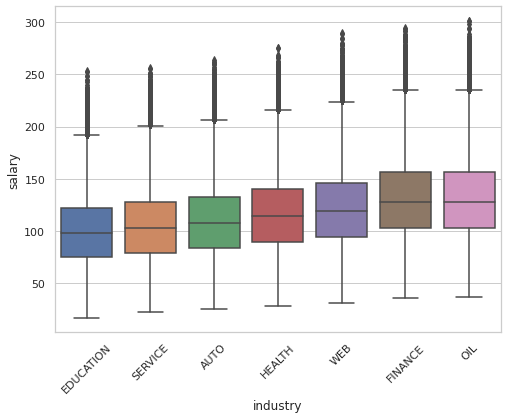

In [212]:
expl_relation(train_df, 'industry', 'salary', vars_numeric, vars_categorical)

The amount of salary appears to depent on the industry. Whereby finance and oil industry pay the best salaries. 

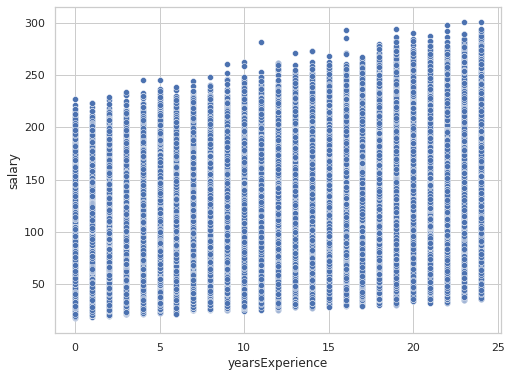

In [213]:
expl_relation(train_df, 'yearsExperience', 'salary', vars_numeric, vars_categorical)

There appears to be a positive trend between years of job experience and salary. 

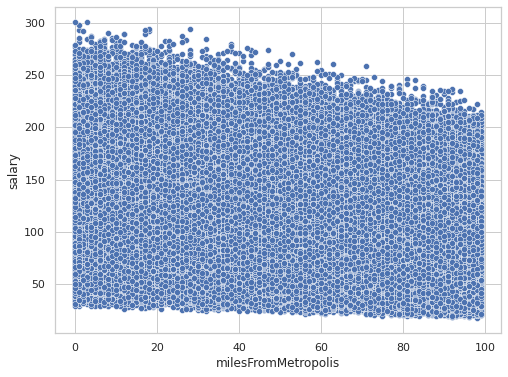

In [214]:
expl_relation(train_df, 'milesFromMetropolis', 'salary', vars_numeric, vars_categorical)

There appears to be a negative relation between miles away from metropolis and salary height. The further away from a city centre the lower the salary. 

#### Explore correlations between feature variables and target variable

Pearsons's R correlations among numerical variables

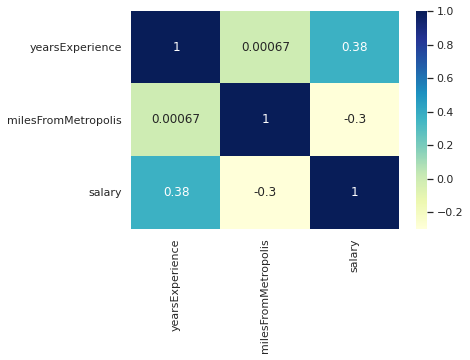

In [215]:
corrMatrix = train_df.corr()
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu")
plt.show()

There is a positive correlation between years of experience and salary indicating that employees with more years of experience earn higher salaries. Conversely, there is a negative correlation between the miles from metropolis and salary suggesting that individuals who live further away from a major city receive lower salaries. 

#### Associations between categorical features and target variable

The boxplots above already indicate that there appear to be associations between certain categorical variables and the target variable. For instance, there appears to be an association between type of industry (education, service, ..., oil) and salary in that employees of the oil industry tend to earn more than employees of the education industry. However, formally Person's R is not defined for categorical variables. 

In order to delineate a form of "correlation" between the categorical feature variables and our numeric target variable 'salary' we can compute the correlation ratio Eta. Partial eta squared (np2) is equal to the eta squared when conducting a one-way ANOVA. 

How to interprete the effect size based on the eta squared values (np2) according to Cohen (1988)

| np2 | effect size|
| --- | ----------- |
| 0.00 < 0.01 | negligible|
| 0.01 < 0.06 | small |
| 0.06 < 0.14 | medium|
| 0.14 <=1.00 | large|

In [216]:
pg.anova(dv='salary', between='jobType', data=train_df, detailed=True)

Source            SS      DF            MS             F  p-unc       np2
0  jobType  5.350893e+08       7  7.644132e+07  79301.489722    0.0  0.356962
1   Within  9.639205e+08  999987  9.639330e+02           NaN    NaN       NaN

In [217]:
pg.anova(dv='salary', between='degree', data=train_df, detailed=True)

Source            SS      DF            MS             F  p-unc       np2
0  degree  2.414028e+08       4  6.035071e+07  47988.053538    0.0  0.161042
1  Within  1.257607e+09  999990  1.257619e+03           NaN    NaN       NaN

In [218]:
pg.anova(dv='salary', between='major', data=train_df, detailed=True)

Source            SS      DF            MS             F  p-unc       np2
0   major  2.149499e+08       8  2.686873e+07  20924.535311    0.0  0.143395
1  Within  1.284060e+09  999986  1.284078e+03           NaN    NaN       NaN

In [219]:
pg.anova(dv='salary', between='industry', data=train_df, detailed=True)

Source            SS      DF            MS             F  p-unc       np2
0  industry  1.318936e+08       6  2.198227e+07  16079.108316    0.0  0.087987
1    Within  1.367116e+09  999988  1.367133e+03           NaN    NaN       NaN

In [220]:
pg.anova(dv='salary', between='companyId', data=train_df, detailed=True)

Source            SS      DF           MS         F    p-unc       np2
0  companyId  1.082649e+05      62  1746.208134  1.164913  0.17588  0.000072
1     Within  1.498901e+09  999932  1499.003414       NaN      NaN       NaN

The strongest relation between a categorical variable and the target variable salary was observed for jobType, followed by degree and major. A small effect size was observed for the relation between industry type and salary whareas the relation between individual company and salary was negligible.I decided to drop companyId as a feature from further analysis. 

### ---- 5 Formulate solutions for model development  ---- <a name ="solutions5"></a>

The relationships between individual feature variables and the target variable 'salary' look linear for many features as indicated by the correlational analysis. A simple linear regression model was therefore chosen as the first model. In a second analysis, polynomial regression was applied in order to delineate whether accounting for non-linearity will improve the model fit. Finally, a random forest regression model will be computed. 

## Part 3 - Model Development and Evaluation <a name ="mod3"></a>

Develop and evaluate models to predict salaries based on provided features. 

In [221]:
# import libraries 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 

### ---- Preprocess Data for Modeling  ---- <a name ="prep1"></a>

In [222]:
# define name and category of inputs for models 
cat_features = ['jobType', 'degree', 'major', 'industry']
num_features = ['yearsExperience', 'milesFromMetropolis']
var_target = ['salary']



# one hot encoding of categorical variables of training features 
cat_only_df = pd.get_dummies(train_df[cat_features])
num_only_df = train_df[num_features].apply(pd.to_numeric)
features_df_e = pd.concat([cat_only_df, num_only_df], axis=1)


# one hot encoding of categorical variables of test features
test_cat_only_df = pd.get_dummies(test_features_df[cat_features])
test_num_only_df = test_features_df[num_features].apply(pd.to_numeric)
test_features_df_e = pd.concat([test_cat_only_df, test_num_only_df], axis=1)



# concatenate with target df prior to shuffling
target_df = train_df[var_target]
features_df_et = pd.concat([features_df_e, target_df], axis=1)

# shuffle data
features_df_ets = shuffle(features_df_et)


# train_df_ess contains dummy encoded, scaled and shuffled data and is ready for modelling 

target_ser = features_df_ets['salary']
features_df = features_df_ets.drop('salary', axis=1)




In [223]:
features_df.head(4)
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 517811 to 411158
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   jobType_CEO             999995 non-null  uint8
 1   jobType_CFO             999995 non-null  uint8
 2   jobType_CTO             999995 non-null  uint8
 3   jobType_JANITOR         999995 non-null  uint8
 4   jobType_JUNIOR          999995 non-null  uint8
 5   jobType_MANAGER         999995 non-null  uint8
 6   jobType_SENIOR          999995 non-null  uint8
 7   jobType_VICE_PRESIDENT  999995 non-null  uint8
 8   degree_BACHELORS        999995 non-null  uint8
 9   degree_DOCTORAL         999995 non-null  uint8
 10  degree_HIGH_SCHOOL      999995 non-null  uint8
 11  degree_MASTERS          999995 non-null  uint8
 12  degree_NONE             999995 non-null  uint8
 13  major_BIOLOGY           999995 non-null  uint8
 14  major_BUSINESS          999995 non-null  uint8


In [224]:
features_df.head(4)

jobType_CEO  jobType_CFO  jobType_CTO  jobType_JANITOR  \
517811            0            0            1                0   
333309            0            0            1                0   
588059            0            0            0                0   
732644            0            0            1                0   

        jobType_JUNIOR  jobType_MANAGER  jobType_SENIOR  \
517811               0                0               0   
333309               0                0               0   
588059               1                0               0   
732644               0                0               0   

        jobType_VICE_PRESIDENT  degree_BACHELORS  degree_DOCTORAL  ...  \
517811                       0                 1                0  ...   
333309                       0                 0                1  ...   
588059                       0                 0                0  ...   
732644                       0                 0                0  ...   

        major_PHYSICS  industry_AUTO  industry_EDUCATION  industry_FINANCE  \
517811              0              0                   0                 0   
333309              0              0                   1                 0   
588059              0              1                   0                 0   
732644              0              0                   0                 0   

        industry_HEALTH  industry_OIL  industry_SERVICE  industry_WEB  \
517811                0             1                 0             0   
333309                0             0                 0             0   
588059                0             0                 0             0   
732644                1             0                 0             0   

        yearsExperience  milesFromMetropolis  
517811               14                   16  
333309               22                   53  
588059                0                   65  
732644                3                    0  

[4 rows x 31 columns]

In [225]:
target_df.head(4)

salary
0     130
1     101
2     137
3     142

In [226]:
test_features_df_e.head()
test_features_df_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                  Non-Null Count    Dtype
---  ------                  --------------    -----
 0   jobType_CEO             1000000 non-null  uint8
 1   jobType_CFO             1000000 non-null  uint8
 2   jobType_CTO             1000000 non-null  uint8
 3   jobType_JANITOR         1000000 non-null  uint8
 4   jobType_JUNIOR          1000000 non-null  uint8
 5   jobType_MANAGER         1000000 non-null  uint8
 6   jobType_SENIOR          1000000 non-null  uint8
 7   jobType_VICE_PRESIDENT  1000000 non-null  uint8
 8   degree_BACHELORS        1000000 non-null  uint8
 9   degree_DOCTORAL         1000000 non-null  uint8
 10  degree_HIGH_SCHOOL      1000000 non-null  uint8
 11  degree_MASTERS          1000000 non-null  uint8
 12  degree_NONE             1000000 non-null  uint8
 13  major_BIOLOGY           1000000 non-null  uint8
 14  major_BUSINESS          1000000 non

In [227]:
test_features_df_e.head()

jobType_CEO  jobType_CFO  jobType_CTO  jobType_JANITOR  jobType_JUNIOR  \
0            0            0            0                0               0   
1            0            0            0                0               1   
2            0            0            1                0               0   
3            0            0            0                0               0   
4            0            0            0                0               1   

   jobType_MANAGER  jobType_SENIOR  jobType_VICE_PRESIDENT  degree_BACHELORS  \
0                1               0                       0                 0   
1                0               0                       0                 0   
2                0               0                       0                 0   
3                1               0                       0                 0   
4                0               0                       0                 0   

   degree_DOCTORAL  ...  major_PHYSICS  industry_AUTO  industry_EDUCATION  \
0                0  ...              0              0                   0   
1                0  ...              0              1                   0   
2                0  ...              0              0                   0   
3                0  ...              0              0                   0   
4                1  ...              0              0                   0   

   industry_FINANCE  industry_HEALTH  industry_OIL  industry_SERVICE  \
0                 0                1             0                 0   
1                 0                0             0                 0   
2                 0                1             0                 0   
3                 0                0             1                 0   
4                 0                0             1                 0   

   industry_WEB  yearsExperience  milesFromMetropolis  
0             0               22                   73  
1             0               20                   47  
2             0               17                    9  
3             0               14                   96  
4             0               10                   44  

[5 rows x 31 columns]

### ---- Train Models ---- <a name ="train2"></a>

In [228]:
# methods for model training with cross validation and model evaluation 

def cv_train(model, df_features, target):
    """ train models and save MSE scores for each model"""
    res_mse_neg = cross_val_score(model, df_features, target, scoring='neg_mean_squared_error', cv=5)
    results = {}
    results['cv_mean_mse'] = abs(res_mse_neg.mean())
    results['cv_range'] = abs(res_mse_neg.max() - res_mse_neg.min())
    results['cv_std']= res_mse_neg.std()
    return results
    
    

def print_summary(model_lst, results_dict):
    """ print summary of results for each model """
    print('Performance of each model for the training set:')
    print('--------------------------------- \n')
    for model in model_lst: 
        print('Name of model:\t', model, '\n')
        print('Mean MSE:\t', results_dict[model]['cv_mean_mse'], '\n')
        print('Standard Deviation of CV MSE scores:\t', results_dict[model]['cv_std'],'\n')
        print('Range of CV MSE scores: \t', results_dict[model]['cv_range'], '\n')
        print('\n')
        print('\n')
    

In [229]:
#initialize variables to save results of model training
model_list = []
models_results = {}

# initialize models

# linear regression
lmr = LinearRegression()
model_list.append(lmr)

# polynomial regression 2nd degree
lmr_pol_std = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
model_list.append(lmr_pol_std)


# random forest regression 
rf = RandomForestRegressor(n_estimators=125, n_jobs=2, max_depth=25, max_features=30, random_state = 16, \
                           min_samples_split=60)

model_list.append(rf)



# train models and save results
for model in model_list:
    models_results[model] = cv_train(model, features_df, target_ser)

# print results 
print_summary(model_list, models_results)
    

Performance of each model for the training set:
--------------------------------- 

Name of model:	 LinearRegression() 

Mean MSE:	 384.40637661123003 

Standard Deviation of CV MSE scores:	 0.6218451918049419 

Range of CV MSE scores: 	 1.7367219054625025 





Name of model:	 Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())]) 

Mean MSE:	 354.0162980221554 

Standard Deviation of CV MSE scores:	 0.6678832013719356 

Range of CV MSE scores: 	 1.7281708205530322 





Name of model:	 RandomForestRegressor(max_depth=25, max_features=30, min_samples_split=60,
                      n_estimators=125, n_jobs=2, random_state=16) 

Mean MSE:	 365.4988748441874 

Standard Deviation of CV MSE scores:	 0.7060143502057676 

Range of CV MSE scores: 	 1.9352347349779393 







### ---- Predict Salaries ---- <a name ="predict3"></a>

The polynomial regression model yielded the smallest MSE and thus performed best in predicting salary values in the training set. 

In [240]:
# train polynomial model on entire dataset

reg_pol = PolynomialFeatures(degree=2)
features_poly = reg_pol.fit_transform(features_df)

lmr_poly = LinearRegression()
lmr_poly.fit(features_poly, target_ser)


LinearRegression()

In [241]:
# predict yhat scores for the test set 

test_features_poly = reg_pol.fit_transform(test_features_df_e)
test_yhat = lmr_poly.predict(test_features_poly)

In [242]:
test_yhat[1:10]

array([ 92.89067733, 183.18995571, 103.72980201, 116.09186828,
       154.97408712,  97.62043059, 118.99064672, 105.72443378,
        98.0168103 ])

In [243]:
# save predicted salaries for test set to current working directory  
pd.DataFrame(test_yhat).to_csv('test_predicted_salaries.csv')
